In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.ticker as mtick


# EDA homicidios

Primero abordaremos el dataset de homicidios, para buscar datos relevantes sobre las vicitmas de accidentes que murieron a causa del suceso, ya sea el mismo día o días después

## Proporciones individuales por cada variable
se analizan que proproción tiene cada variable, categorizando en algunos casos las variables numéricas para poder dimensionar como están organizada toda la información, para después hacer un análisis más profundo relacionando las variables entre si, para encontrar tendencias o patrones generales.

In [2]:
dfhomicidios=pd.read_csv('Datasets\homicidios.csv')
dfhomicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             715 non-null    object 
 1   Rol                            705 non-null    object 
 2   Víctima                        707 non-null    object 
 3   Sexo                           711 non-null    object 
 4   Edad                           664 non-null    float64
 5   Días_de_muerte_post_accidente  649 non-null    float64
 6   No_víctimas                    715 non-null    float64
 7   Fecha                          715 non-null    object 
 8   Hora_formato                   714 non-null    object 
 9   Hora                           714 non-null    float64
 10  Tipo_de_calle                  715 non-null    object 
 11  Calle                          715 non-null    object 
 12  Comuna                         715 non-null    flo

In [3]:
#se transforman las columnas al tipo de datoadecuado, para poder usarse
dfhomicidios['Fecha']=pd.to_datetime(dfhomicidios.Fecha,errors='coerce')



In [40]:
# Primero tenemos una idea de como estan distribuidos los datos nulos en todo el dataframe
# primero representamos con procentajes del total de cada columna el valor de los nulos
round(dfhomicidios.isnull().sum()/len(dfhomicidios)*100,2)

Id                               0.00
Rol                              1.40
Víctima                          1.12
Sexo                             0.56
Edad                             7.13
Días_de_muerte_post_accidente    9.23
No_víctimas                      0.00
Fecha                            0.00
Hora_formato                     0.14
Hora                             0.14
Tipo_de_calle                    0.00
Calle                            0.00
Comuna                           0.00
X                                0.00
Y                                0.00
Acusado                          2.94
Cruce_o_altura                   5.87
Rango_edad                       0.00
dtype: float64

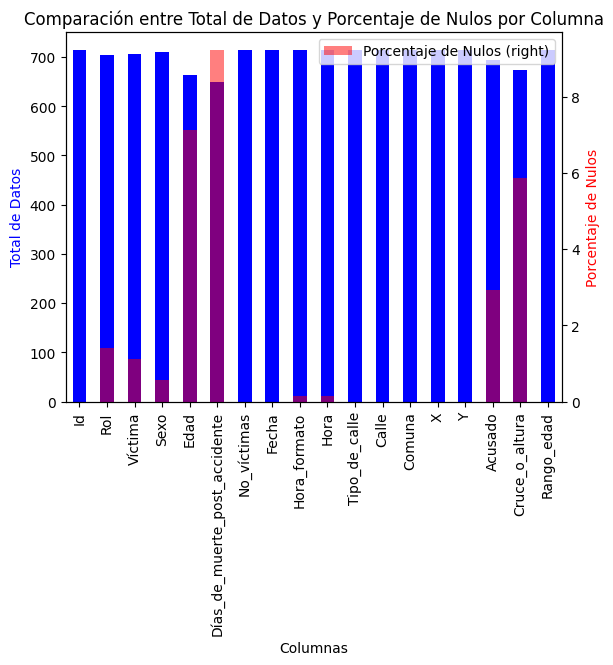

In [34]:

# Crear el primer gráfico con el total de datos por columna
total_por_columna = dfhomicidios.count()
ax = total_por_columna.plot(kind='bar', color='blue', label='Total de Datos')

# Crear el segundo gráfico con el porcentaje de valores nulos encima de cada barra
porcentaje_nulos = (dfhomicidios.isnull().sum() / len(dfhomicidios)) * 100
porcentaje_nulos.plot(kind='bar', color='red', alpha=0.5, label='Porcentaje de Nulos', ax=ax, secondary_y=True)

# Añadir etiquetas y leyendas
ax.set_xlabel('Columnas')
ax.set_ylabel('Total de Datos', color='blue')
ax.right_ax.set_ylabel('Porcentaje de Nulos', color='red')
plt.title('Comparación entre Total de Datos y Porcentaje de Nulos por Columna')
plt.legend()

# Mostrar el gráfico
plt.show()


## Outliers

Revisamos outliers en las dos columnas numpericas.
En la columa Edad solo encontramos que todas las edades corresponden a un rango normal de edades, ninguna tiene un párametro fuera de lo humanamente posible en la actualidad.
En la columa Días de muerte post accidente encontramos que la mayoíra se encuentran en el número cero, y el resto se distribuyen a lo largo del 1 al 26-27, sin que esto represente un valor atípico, simplemente se salen de la media para esta columna.
En la columna No víctimas encontramos que la mayoría de nuestros datos son igula al valor de 1 numérico y el resto son entre el número dos o tres, no muestran algpun valor atípico.

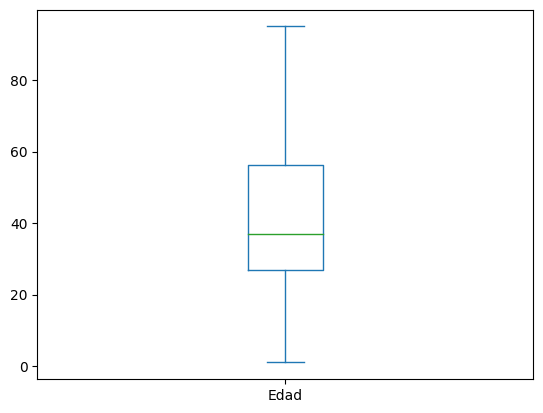

In [50]:
dfhomicidios[['Edad']].plot(kind='box')
plt.show()

<Axes: >

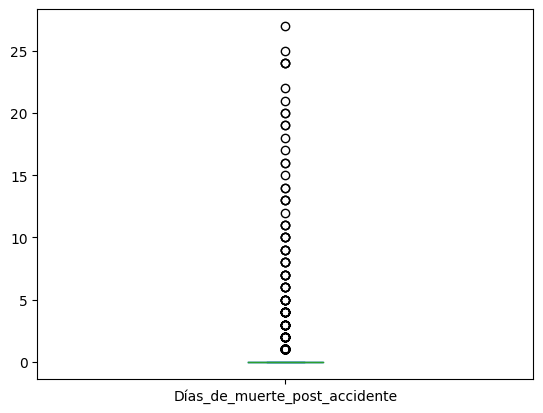

In [51]:
dfhomicidios.Días_de_muerte_post_accidente.plot(kind='box')

<Axes: >

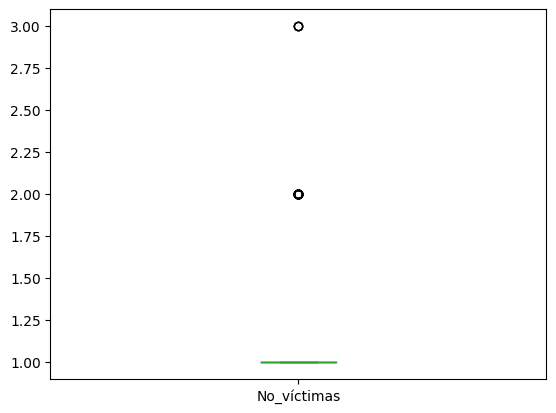

In [53]:
dfhomicidios['No_víctimas'].plot(kind='box')

## Variables individuales
Analizaremos cada columna del dataset, para evaluar características relevantes de cada columna

### Fecha
En la primer gráfica podemos observar que el año con más accidentes fué el 2018, despúes vimos una disminución drástica para lo siguientes años, esto puede deberse a que a principios de 2020 se expandió a nivel mundial la pandemia del COVID 19, lo cual repercutió en que la gente se aislará en sus casa el primer año de pandemia, y e los años posteriores empezó a disminuir este aislamiento.

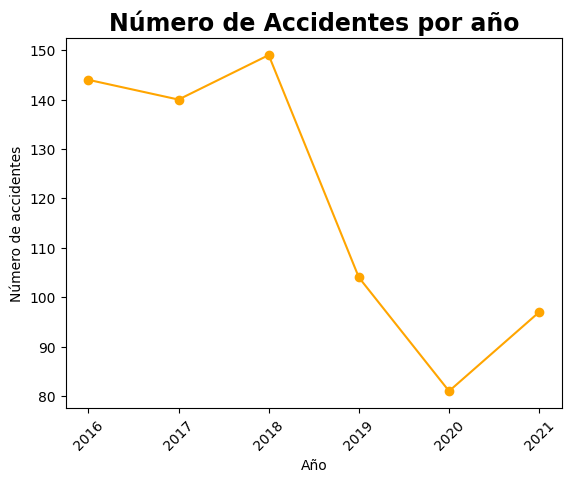

In [4]:
graffecha=dfhomicidios.Fecha.groupby(dfhomicidios['Fecha'].dt.year).size()
graffecha.plot(kind='line', rot=45, xlabel='Año',marker='o',color='orange', ylabel='Número de accidentes')
plt.title("Número de Accidentes por año",fontdict={'size':17,'weight':'bold'})
plt.show()


### Rol de la víctima en el medio de transporte que ocupaba
Dentro de la columna rol nos indica cual era el rol en el medio de transporte qe ocupaba la persona que murió a causa del accidente, donde observamos que encabezan el conductor como las personas que más tienden a fallecer al momento de un acciendte dominando con un 46.1% del total, seguido por los peatones con un 37.2%, se suamn los pasajeros acompañantes con un 11.2% y siguen los ciclistas con un 4.1%, cabe destacar que en la mayoría de caso que ocurre un accidente donde involucra un ciclista, la víctima suele ser el ciclista cuando también está involucrado un automóvil. del total de datos, desconocemos el rol del 1.5% del total de datos.

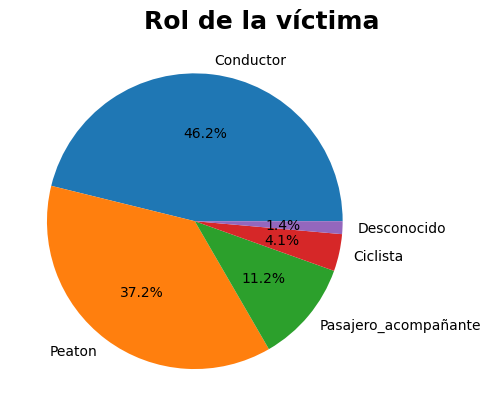

In [5]:
valrol=dfhomicidios.Rol.value_counts(dropna=False).values
etiqrol=dfhomicidios.Rol.value_counts(dropna=False).index
etiqrol=etiqrol.fillna('Desconocido')
plt.pie(valrol,autopct='%1.1f%%',labels=etiqrol)
plt.title(label='Rol de la víctima', fontdict={'size':18,'weight':'bold'},loc='right')
plt.show()


### Víctima
Aqui podemos notar que los medios de transporte que más predominan son las motocicletas seguido de los peatones, dando a entender que cualquier persona que sufra un accidnete donde sea la víctima y vaya en este medio de transporte es más propenso a morir, dado a que se esta más expuesto a sufrir lesiones graves al no portar con medidas mas reforzadas de seguridad comparado con un vehículo

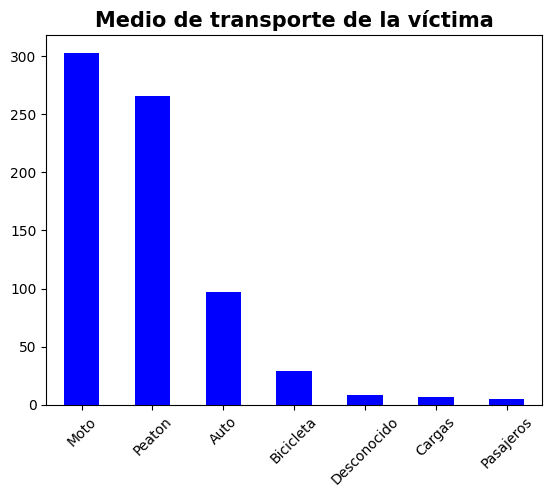

In [6]:
dfhomicidios.Víctima.fillna('Desconocido').value_counts().plot(kind='bar',color='blue',rot=45,xlabel='')
plt.title(label='Medio de transporte de la víctima',fontdict={'size':15,'weight':'bold'})
plt.show()

### Sexo
Aquí observamos que la mayoría de casos con un 76% predominan los hombres, y un 23.2% las mujeres, 0.8% se desconoce su sexo.

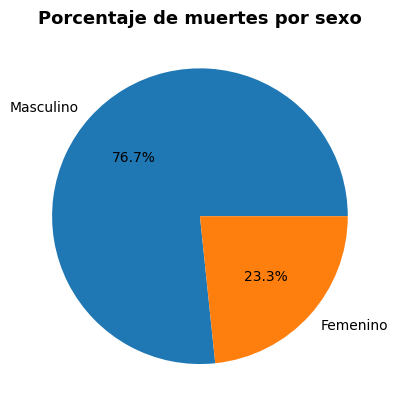

In [7]:
dfhomicidios.Sexo.value_counts().plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.title(label='Porcentaje de muertes por sexo',fontdict={'size':13,'weight':'bold'})
plt.show()

### Días de muerte post accidente
Aqui podemos observar que el 69.9% de las muertes sucedieron el mismo día del accidente, desconocemos cuanto tiempo pasó después del accidente hasta la hora de su muerte, el 20.9% murierondías después del accidente y desconocemos el 9.5% de los casos registrados.
El hecho que 69.9% murieran el mismo día nos puede dar un indicio de que los accientes fueron de índole grave, reducicnedo drásticamete la posibilidad de que sobrevivieran

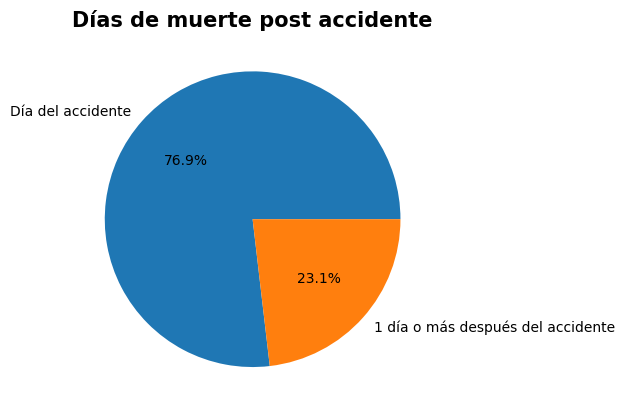

In [8]:
dmpahomicidios=pd.Series()
dmpahomicidios.loc['Día del accidente']=dfhomicidios['Días_de_muerte_post_accidente'].value_counts().iloc[0]
dmpahomicidios.loc['1 día o más después del accidente']=dfhomicidios['Días_de_muerte_post_accidente'].value_counts().iloc[1:-1].sum()
dmpahomicidios.plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.title(label="Días de muerte post accidente",fontdict={'size':15,'weight':'bold'},loc='center')
plt.show()

### Edades de los muertos
Del total de accidentes solo tenemos el 93.2% registrados por edad, de esos registros se tiene que el grupo donde hubo más muertes fue el que se encuentra en el rango de edad de 20 a 39 años, seguiod del rango de 40 a 57 años


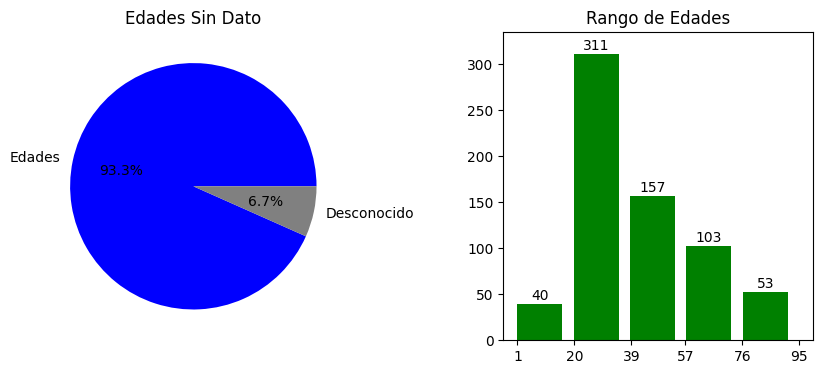

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1 - Gráfico de pastel
axs[0].pie(x=[dfhomicidios.Edad.notnull().size, dfhomicidios.Edad[dfhomicidios.Edad.isnull()].size],
           labels=['Edades', 'Desconocido'],autopct='%1.1f%%',
           colors=['blue', 'gray'])
axs[0].set_title('Edades Sin Dato')

# Subplot 2 - Histograma
n, bins, patches = axs[1].hist(dfhomicidios.Edad, bins=5, width=15, color=['green'],align='mid')
axs[1].set_xticks(bins.round())
plt.title('Rango de Edades')

for count, x, y in zip(n, bins, patches):
    axs[1].text(x + 7.5, count + 1, str(int(count)), ha='center', va='bottom', color='black')
axs[1].set_ylim(0,335)
# Ajustar la separación entre subgráficos en el eje horizontal
plt.subplots_adjust(wspace=0.5)

# Mostrar la figura
plt.show()


### Número de víctimas
En el siguiente gráfico observamos que en la mayor parte de accidentes con el 94.3% fueron de 1 víctima, lo caul es relativamente aletador, considerando que en la mayor parte de muertes por accidentes viales si llega a haber una defunción 1 persona es la que llega  a morir, y en menor proporción dos o más personas, sin quitar de vista el objetivo de reducir en cualquier aspecto los accidentes viales.

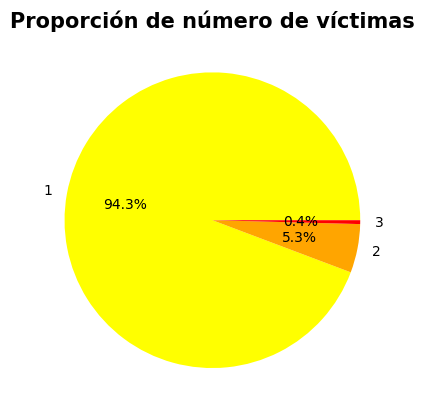

In [10]:
dfhomicidios.No_víctimas.astype(int).value_counts().plot(kind='pie',colors=['yellow','orange','red'],ylabel='',autopct='%1.1f%%')
plt.title(label='Proporción de número de víctimas',fontdict={'weight':'bold','size':15})
plt.show()

In [11]:
dfhomicidios.Hora[(dfhomicidios.Hora>=6)&(dfhomicidios.Hora<19)].unique()

array([ 7., 18., 15., 11., 16.,  9.,  6., 10., 17., 12.,  8., 14., 13.])

### Hora del suceso
En la siguiente gráfica tenemos contabilizados el rango de horario en el que sucedieron los accidentes, donde durante el día que se considera una franja horaria de 6 hrs. a 18 hrs.y la noche de 19 hrs. a 5 hrs. se puede observar que al haber una mayor cantidad de gente transitando en el día vemos mayor cantidad de accidetes que en la noche, aunque la difenrecia no estan tan grande entre una y otra categoría

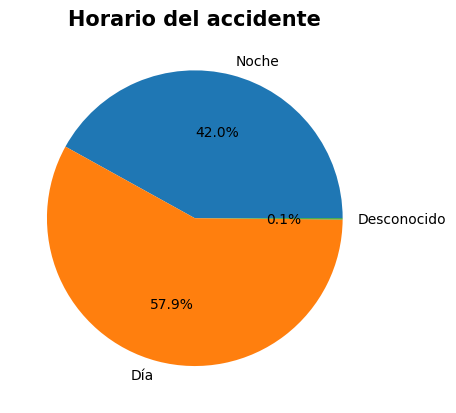

In [12]:
noche=dfhomicidios.Hora[(dfhomicidios.Hora<6)|(dfhomicidios.Hora>=19)].size
dia=dfhomicidios.Hora[(dfhomicidios.Hora>=6)&(dfhomicidios.Hora<19)].size
nulo=dfhomicidios.Hora.isnull().sum()
plt.pie([noche,dia,nulo],labels=['Noche','Día','Desconocido'],autopct='%1.1f%%')
plt.title(label='Horario del accidente',fontdict={'size':15,'weight':'bold'},loc='center')
plt.show()

### Tipo de calle
En este gráfico observamos que en donde ocurren mas accidentes mortales son las avenidas, y las calles y autopistas estpan en menor rango pero con valores similares. 

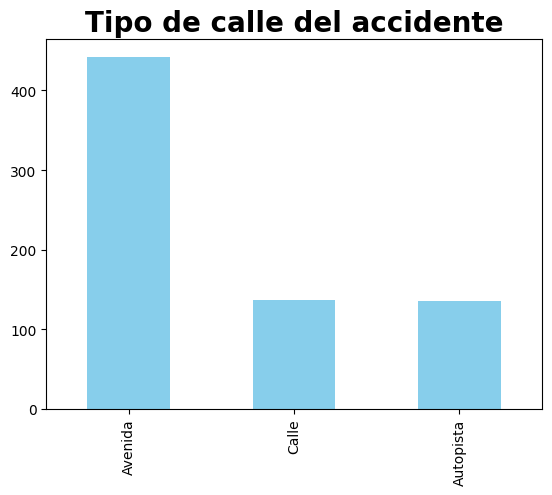

In [13]:
dfhomicidios.Tipo_de_calle.value_counts().plot(kind='bar',color='skyblue',xlabel='')
plt.title(label='Tipo de calle del accidente',fontdict={'size':20,'weight':'bold'})
plt.show()

### Comuna
En la siguiente gráfica podemos observar la frecuencia por comuna donde los accidentes sucedieron, en el mapa de calor pordmoes interactuar con cada una de las comunas y ver los detalles de los accidentes por comuna

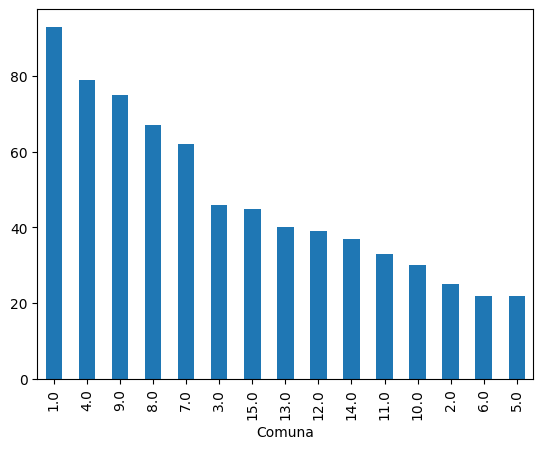

In [14]:
dfhomicidios.Comuna.value_counts().plot(kind='bar')
plt.show()

In [15]:
mapa = folium.Map(location=[dfhomicidios['Y'].iloc[0], dfhomicidios['X'].iloc[0]], zoom_start=12)

# Iterar sobre las comunas y agregar un mapa de calor para cada una
for comuna, datos in dfhomicidios.groupby('Comuna'):
    coordenadas_comuna = datos[['Y', 'X']].values.tolist()
    HeatMap(coordenadas_comuna).add_to(folium.FeatureGroup(name=comuna).add_to(mapa))
# Agregar el mapa de calor con las coordenadas al mapa
folium.LayerControl().add_to(mapa)

# Mostrar el mapa en el Jupyter Notebook
mapa

In [16]:
dfhomicidios.columns

Index(['Id', 'Rol', 'Víctima', 'Sexo', 'Edad', 'Días_de_muerte_post_accidente',
       'No_víctimas', 'Fecha', 'Hora_formato', 'Hora', 'Tipo_de_calle',
       'Calle', 'Comuna', 'X', 'Y', 'Acusado', 'Cruce_o_altura', 'Rango_edad'],
      dtype='object')

### Acusado
En esta gráfica encontramos que los acusados de causar el accidente encabezan con más frecuencia los autos, seguidos de las motos, y en tercer puesto los transportes de carga.

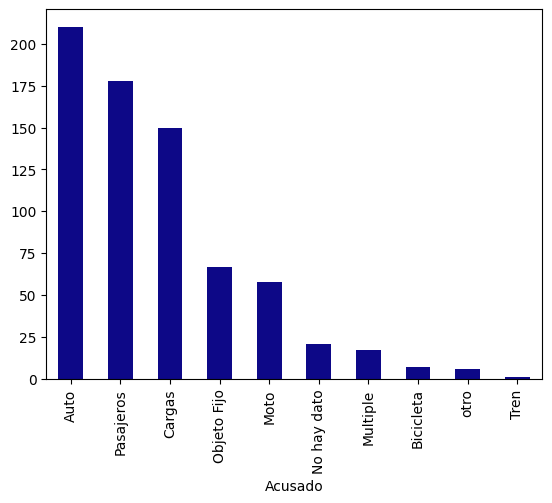

In [17]:
dfhomicidios.Acusado.fillna('No hay dato').value_counts().plot(kind='bar',colormap='plasma')
plt.show()

### Determinación de cruce o altura del incidente
Según la ubicación de donde fue el incidente, se encuentra que la mayoría de muertes se han dado en los accidentes sucedidos en los cruces con un 75.5 % de frecuencia, dándonos a notar que en los cruces donde mayor atención se debe poner para tomar medidas para disminuir estos sucesos. 

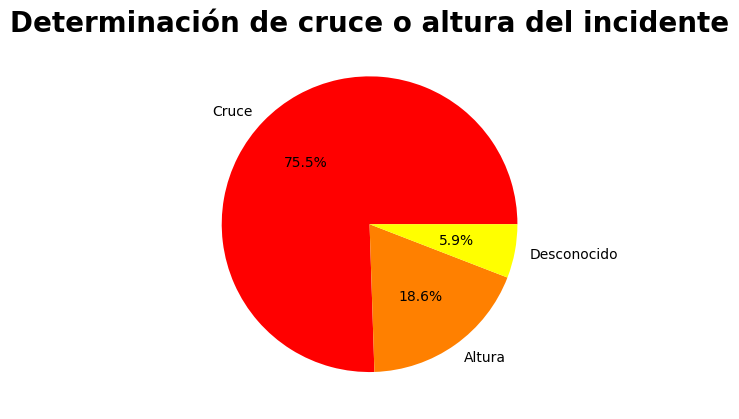

In [18]:
dfhomicidios.Cruce_o_altura.fillna('Desconocido').value_counts(dropna=False).plot(kind='pie',colormap='autumn',ylabel='',autopct='%1.1f%%')
plt.title('Determinación de cruce o altura del incidente',fontdict={'size':20,'weight':'bold'},loc='center')
plt.show()

### Correlación de variables numéricas
Se verifica con una gráfica de correlaciones para ver si exsta algún patrón respecto a las variables númericas entre ellas, pero se observa que no hay una causalidad entre una u otra, son variables independientes entre si.

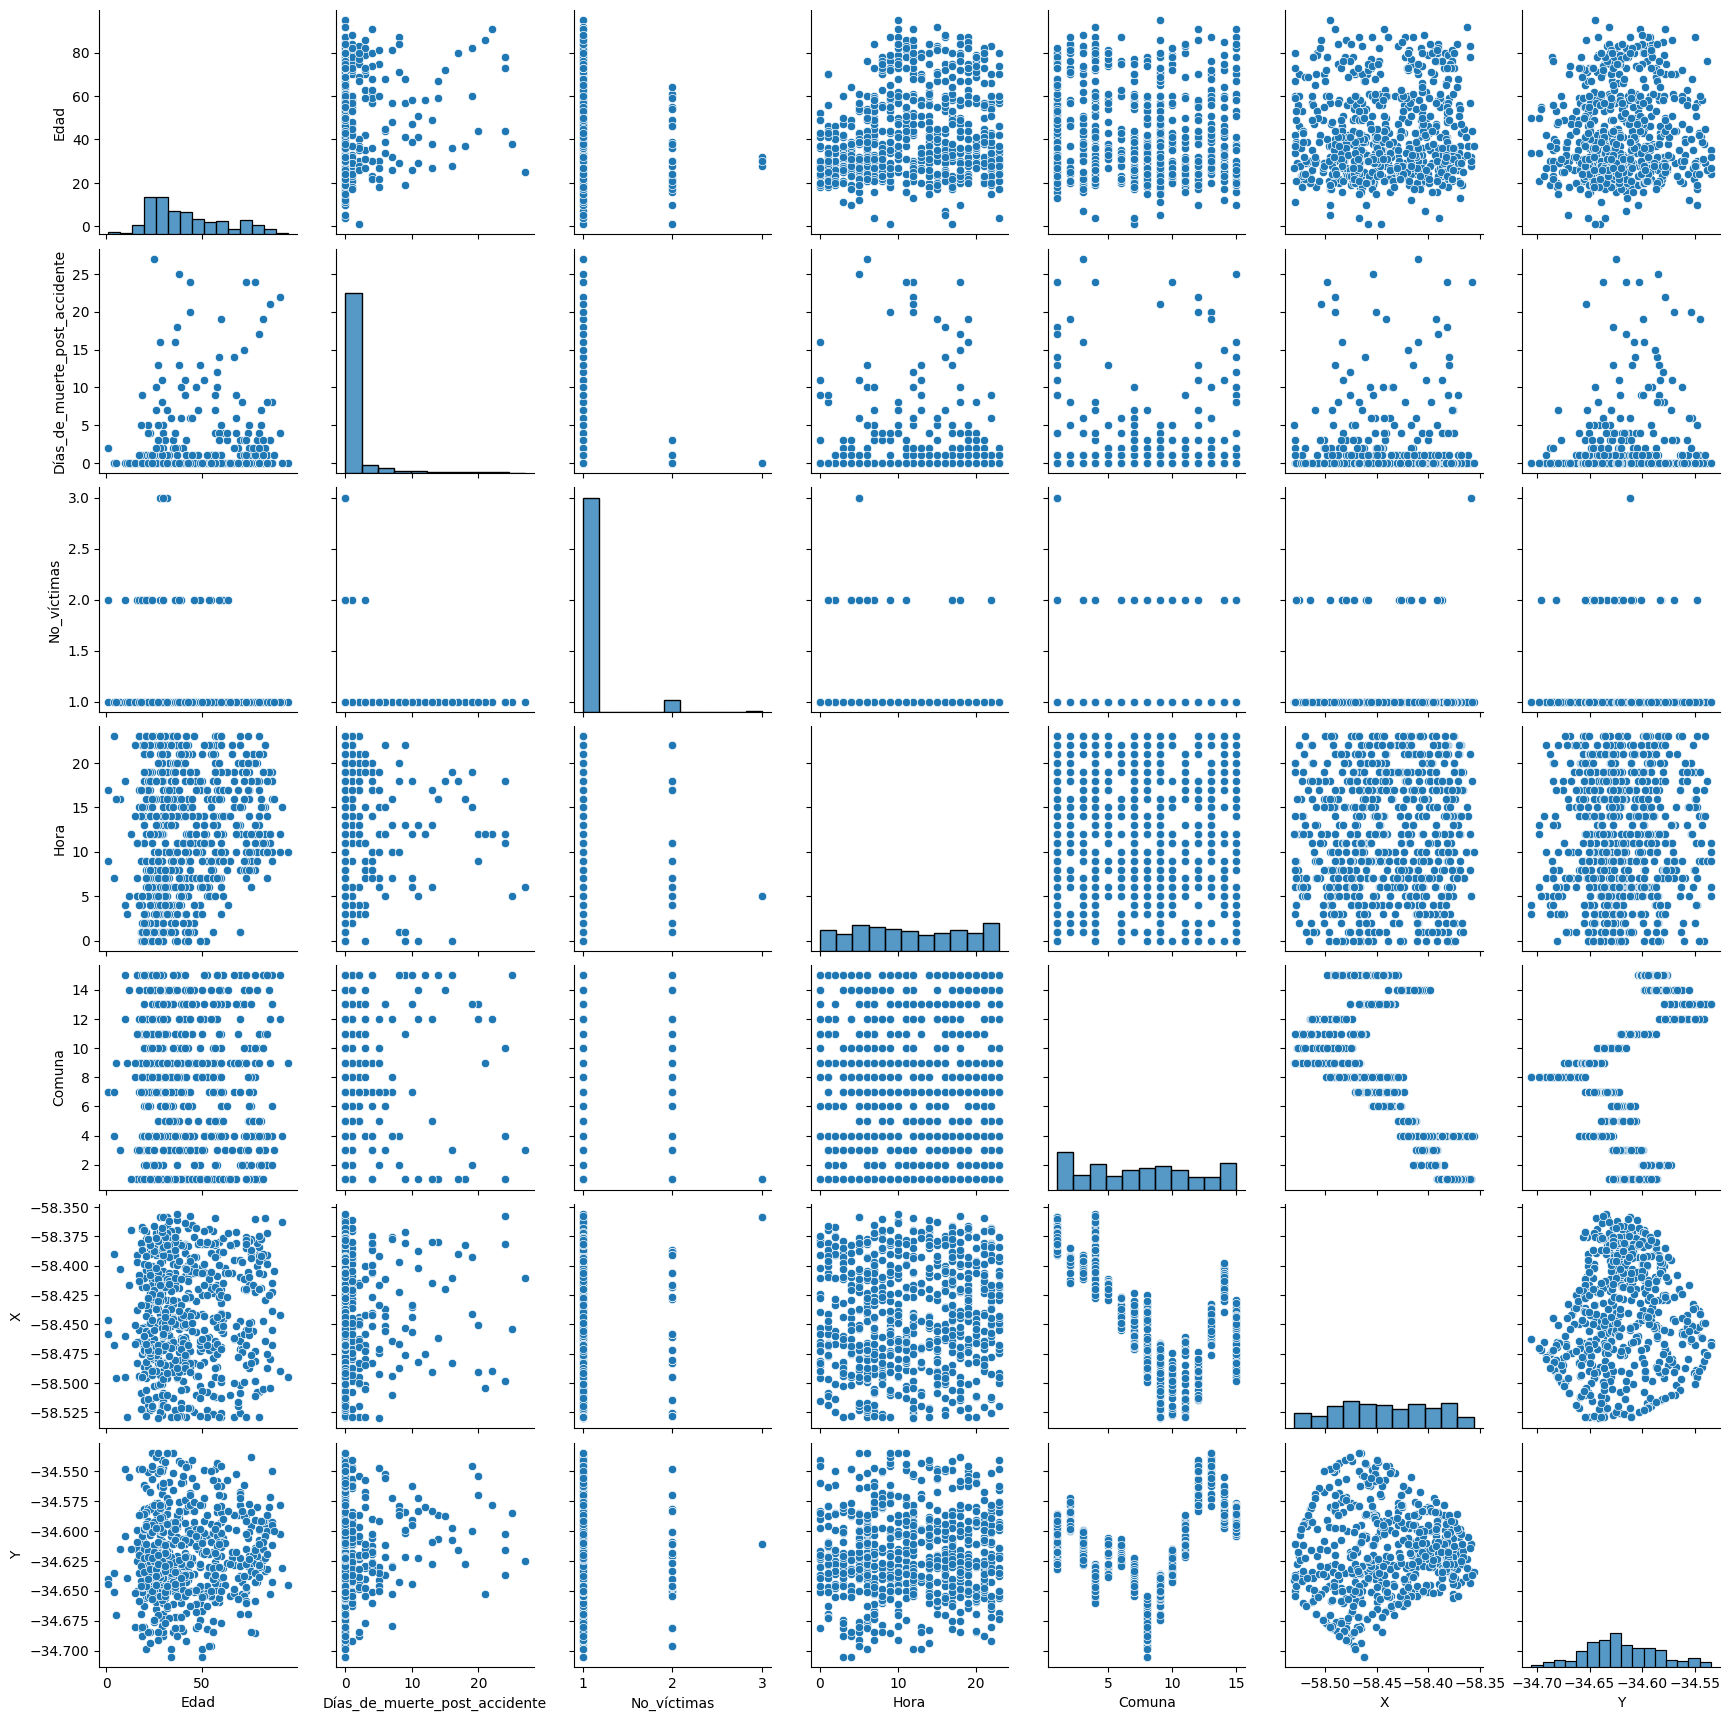

In [19]:
sns.pairplot(dfhomicidios)
plt.show()

# Relaciones entre variables
A continuación veremos un analisis de las principales relaciones entre algunas variables, para encontrar patrones mas significativos para nuestro dashboard

## Víctimas por año

En este gráfico vemos representada la relación de muertes por año, donde del año 2016 a 2018 se veía un aumento en los incidentes con muertes, y de 2019 a 2021 hubo una tendencia a la baja esto correspondiente a la aparaición del COVID-19 y el aislamiento que hubo a nivel mundial, sin embargo en el 2021 aumentó conforme fueron quitando restricciones, lo cual nos indica que debe haber una mayor atención a dismiuir esta clase de incidentes, no solo que deriven en defunciones, sino cualquiere acciednete vial, donde se arriesgue la vida de cualquier persona.

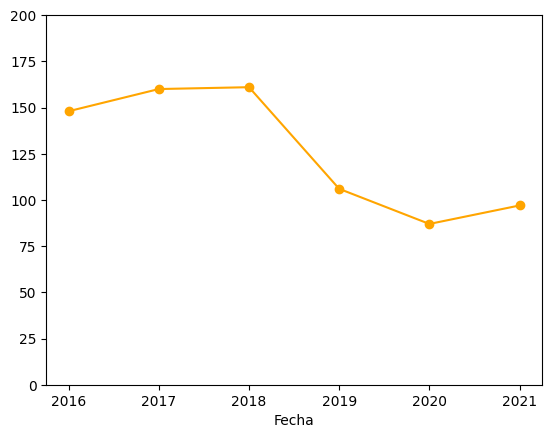

In [20]:
dfhomicidios.groupby(dfhomicidios.Fecha.dt.year)['No_víctimas'].sum().plot(kind='line',marker='o',color='orange' ,ylim=(0,200))
plt.show()

### Tipo de transporte y sexo
Aqui podemos ver la relación entre el tipo de transporte de las víctimas, el número de víctimas y si eran hombres o mujeres, donde en la categoría de auto, moto y bicicleta predominan los hombres, en peatón vemos que la relación se mueve un poco hacia el centro, sin dejar la tendencia a prevalecer los hombres, esto es correspondiente a la relacion global entre hombres y mujeres registrados, donde vemos una diferencia en proporciones es en los transportes de cargas, donde solo existen hombres, donde es un rubro que regularmente son los hombres los que manejan este tipo de vehículo,  y donde en menor escale vemos mas paridad es en el transporte de pasajeros, donde aunque en pequeña escala vemos una proporción similar entre los dos géneros registrados.

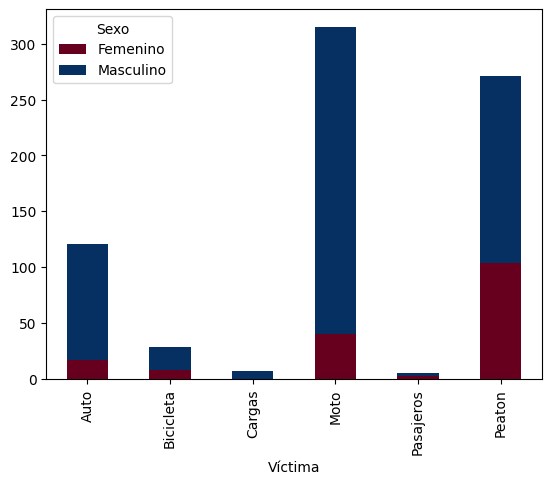

In [21]:
grouped = dfhomicidios.groupby(['Víctima', 'Sexo'])['No_víctimas'].sum().unstack()
grouped.plot(kind='bar', stacked=True,colormap='RdBu')
plt.show()

### Relación entre tipo de calle, cruce o altura, acusado y número de víctimas
Aquí podemos ver los diferentes tipo de accidentes que han sucedido, relacionándolos por tipo de calle, y si fue un cruce de calles o Altura si fue en medio de dos esquina sobre alguna vialidad, donde en las avenidas y cruces es donde suceden más accidentes, y los cuales, los 3 acusados en mayor proporción son los autos, pasajeros  de algun transporte público y fueron lesionados, y los transportes de carga.

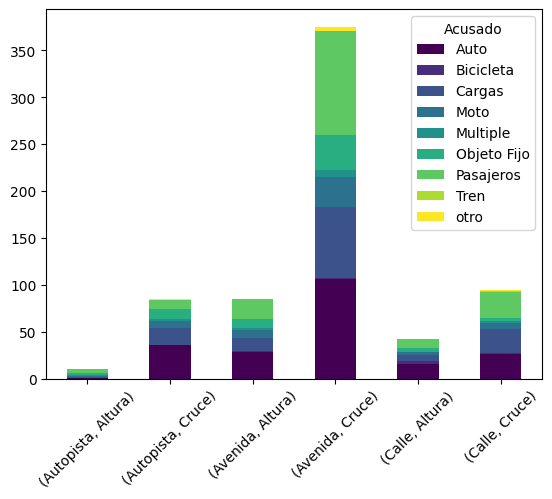

In [22]:
dfhomicidios.groupby(['Tipo_de_calle','Cruce_o_altura','Acusado'])['No_víctimas'].sum().unstack().plot(kind='bar',stacked=True,xlabel='',rot=45,colormap='viridis')
plt.show()

### Relación víctima-Acusado y número de víctimas
Aquí tenemos un conteo, donde se divide por número de víctimas, el medio de transporte del acusado y de la víctima, donde podemos observar que en la mayor parte de grupos de victimas, el acusado es en mayor parte un auto, al igual que los transportes de carga y los pasajeros de trnasportes. las motos junto a los petones son de los que mas accidentes mortales sufren.

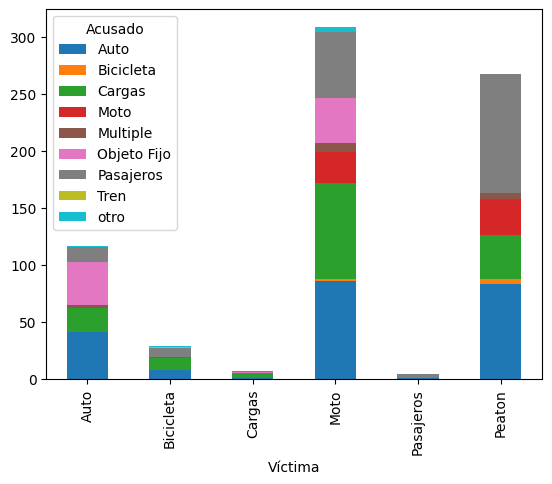

In [23]:
dfhomicidios.groupby(['Víctima','Acusado'])['No_víctimas'].sum().unstack().plot(kind='bar',colormap='tab10',stacked=True)
plt.show()

### Relación víctima-Sexo
Aquí estamos analizando que relación hay entre el medio de trnasporte que utilizaban las víctimas y su género registrado, donde vemos que las mujeres peatones fueron más propensas a sufrir siniestros viales mortales, en comparación con los hombres que predominan más las víctimas en moto, pero en el caso de los hombres la proporción de peatones es mayor que en la de mujeres. También generalizando se puede decir que los hombres fueron más propenso a sufrir accidentes letales, en comparación de las mujeres.

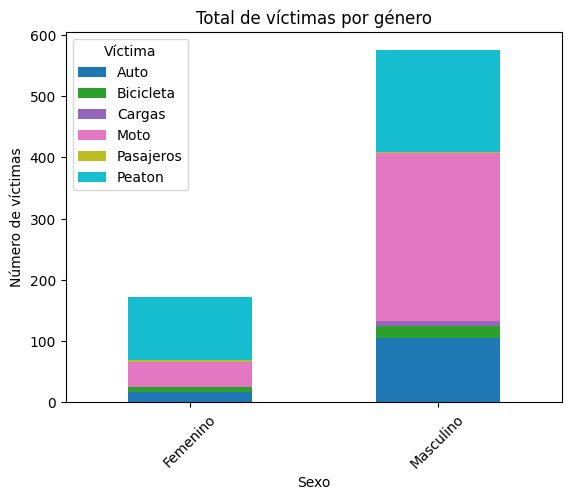

In [24]:
dfhomicidios.groupby(['Sexo','Víctima'])['No_víctimas'].sum().unstack().plot(kind='bar',stacked=True,colormap='tab10',ylabel='Número de víctimas',rot=45,title='Total de víctimas por género')
plt.show()

Comparativa de proprociones

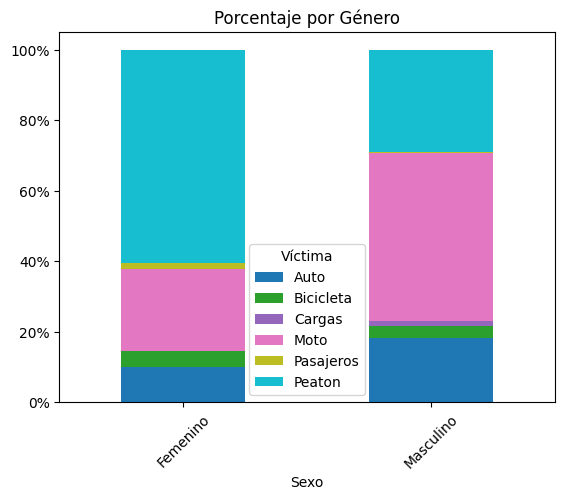

In [25]:
grouped = dfhomicidios.groupby(['Sexo','Víctima'])['No_víctimas'].sum().unstack()
percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100
ax = percentages.plot(kind='bar', stacked=True, colormap='tab10',rot=45,title='Porcentaje por Género')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [26]:
dfhomicidios.columns

Index(['Id', 'Rol', 'Víctima', 'Sexo', 'Edad', 'Días_de_muerte_post_accidente',
       'No_víctimas', 'Fecha', 'Hora_formato', 'Hora', 'Tipo_de_calle',
       'Calle', 'Comuna', 'X', 'Y', 'Acusado', 'Cruce_o_altura', 'Rango_edad'],
      dtype='object')